File to import, clean, and analyze data. Can then move the code to a different file for proper documentation purposes.


In [88]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [89]:
# URL for the dataset
url = "https://github.com/JeffSackmann/tennis_atp/blob/master"

# Load the dataset, going from 2004 to 2024 (picking only atp_matches_years.csv)
years = list(range(2004, 2025))
matches = []
for year in years:
    file_url = f"{url}/atp_matches_{year}.csv?raw=true"
    df = pd.read_csv(file_url)
    matches.append(df)
# Concatenate all dataframes into one
matches_df = pd.concat(matches, ignore_index=True)
# Drop duplicates
# matches_df.drop_duplicates(inplace=True)
# Reset index
matches_df.reset_index(drop=True, inplace=True)

# # Display the first few rows of the dataframe
# print(matches_df.head())
# # Display the shape of the dataframe
# print(matches_df.shape)
# # Display the columns of the dataframe
# print(matches_df.columns)
# # Display the data types of the columns
# print(matches_df.dtypes)
# # Display the summary statistics of the dataframe
# print(matches_df.describe())

In [90]:
print(matches_df["surface"].unique())

['Hard' 'Clay' 'Grass' 'Carpet' nan]


G is Grand Slam
F is Finals
M is Masters
A is Other
D is Davis Cup
O is Null?


In [91]:
# Quantify the data types of the columns
# matches_df["surface"] = matches_df["surface"].map(
#     {
#         "Clay": 1,
#         "Grass": 2,
#         "Hard": 3,
#         "Carpet": 4,
#     }
# )  # Convert surface to numeric


matches_df["tourney_level"] = matches_df["tourney_level"].map(
    {
        "G": 1,
        "M": 2,
        "F": 3,
        "A": 4,
        "C": 5,
        "D": 6,
        "S": 7,
        "T": 8,
        "X": 9,
    }
)  # Convert tourney_level to numeric
matches_df["round"] = matches_df[
    "round"
].map(  # Convert round to numeric (num of players left)
    {
        "R64": 64,
        "R32": 32,
        "R16": 16,
        "QF": 8,
        "SF": 4,
        "F": 2,
        "R128": 128,
        "RR": 1,  # Round Robin
        "BR": 3,  # Best
        "ER": 0,
    }
)  # Early Round
matches_df["winner_hand"] = matches_df["winner_hand"].map(
    {
        "L": 1,
        "R": 2,
        "U": 3,
        "A": 4,
    }
)  # Convert winner_hand to numeric
matches_df["loser_hand"] = matches_df["loser_hand"].map(
    {
        "L": 1,
        "R": 2,
        "U": 3,
        "A": 4,
    }
)  # Convert loser_hand to numeric

# Drop all NA values for the surface column
matches_df.dropna(subset=["surface"], inplace=True)

# Convert the categorical data into numerical data (Ex. Male/Female to 0/1)
matches_df = pd.get_dummies(matches_df, columns=["surface"])

# Turn true/false into 1/0
# matches_df = matches_df[
#     ["surface_Hard", "surface_Clay", "surface_Carpet", "surface_Grass"]
# ].astype(int)

In [92]:
print(matches_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 61737 entries, 0 to 61789
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          61737 non-null  object 
 1   tourney_name        61737 non-null  object 
 2   draw_size           61737 non-null  int64  
 3   tourney_level       61673 non-null  float64
 4   tourney_date        61737 non-null  int64  
 5   match_num           61737 non-null  int64  
 6   winner_id           61737 non-null  int64  
 7   winner_seed         26160 non-null  float64
 8   winner_entry        7974 non-null   object 
 9   winner_name         61737 non-null  object 
 10  winner_hand         61737 non-null  int64  
 11  winner_ht           60722 non-null  float64
 12  winner_ioc          61737 non-null  object 
 13  winner_age          61734 non-null  float64
 14  loser_id            61737 non-null  int64  
 15  loser_seed          14467 non-null  float64
 16  loser_ent

In [93]:
metrics_list = [
    "surface_Carpet",
    "surface_Clay",
    "surface_Grass",
    "surface_Hard",
    "w_ace",
    "w_df",
    "w_svpt",
    "w_1stWon",
    "w_1stIn",
    "w_2ndWon",
    "w_SvGms",
    "w_bpSaved",
    "w_bpFaced",
    "l_ace",
    "l_df",
    "l_svpt",
    "l_1stWon",
    "l_1stIn",
    "l_2ndWon",
    "l_SvGms",
    "l_bpSaved",
    "l_bpFaced",
]

general_list = [
    "surface_Carpet",
    "surface_Clay",
    "surface_Grass",
    "surface_Hard",
    "tourney_level",
    "round",
    "draw_size",
    "match_num",
    "winner_seed",
    "loser_seed",
]

metrics_df = matches_df[metrics_list].copy()

general_df = matches_df[general_list].copy()

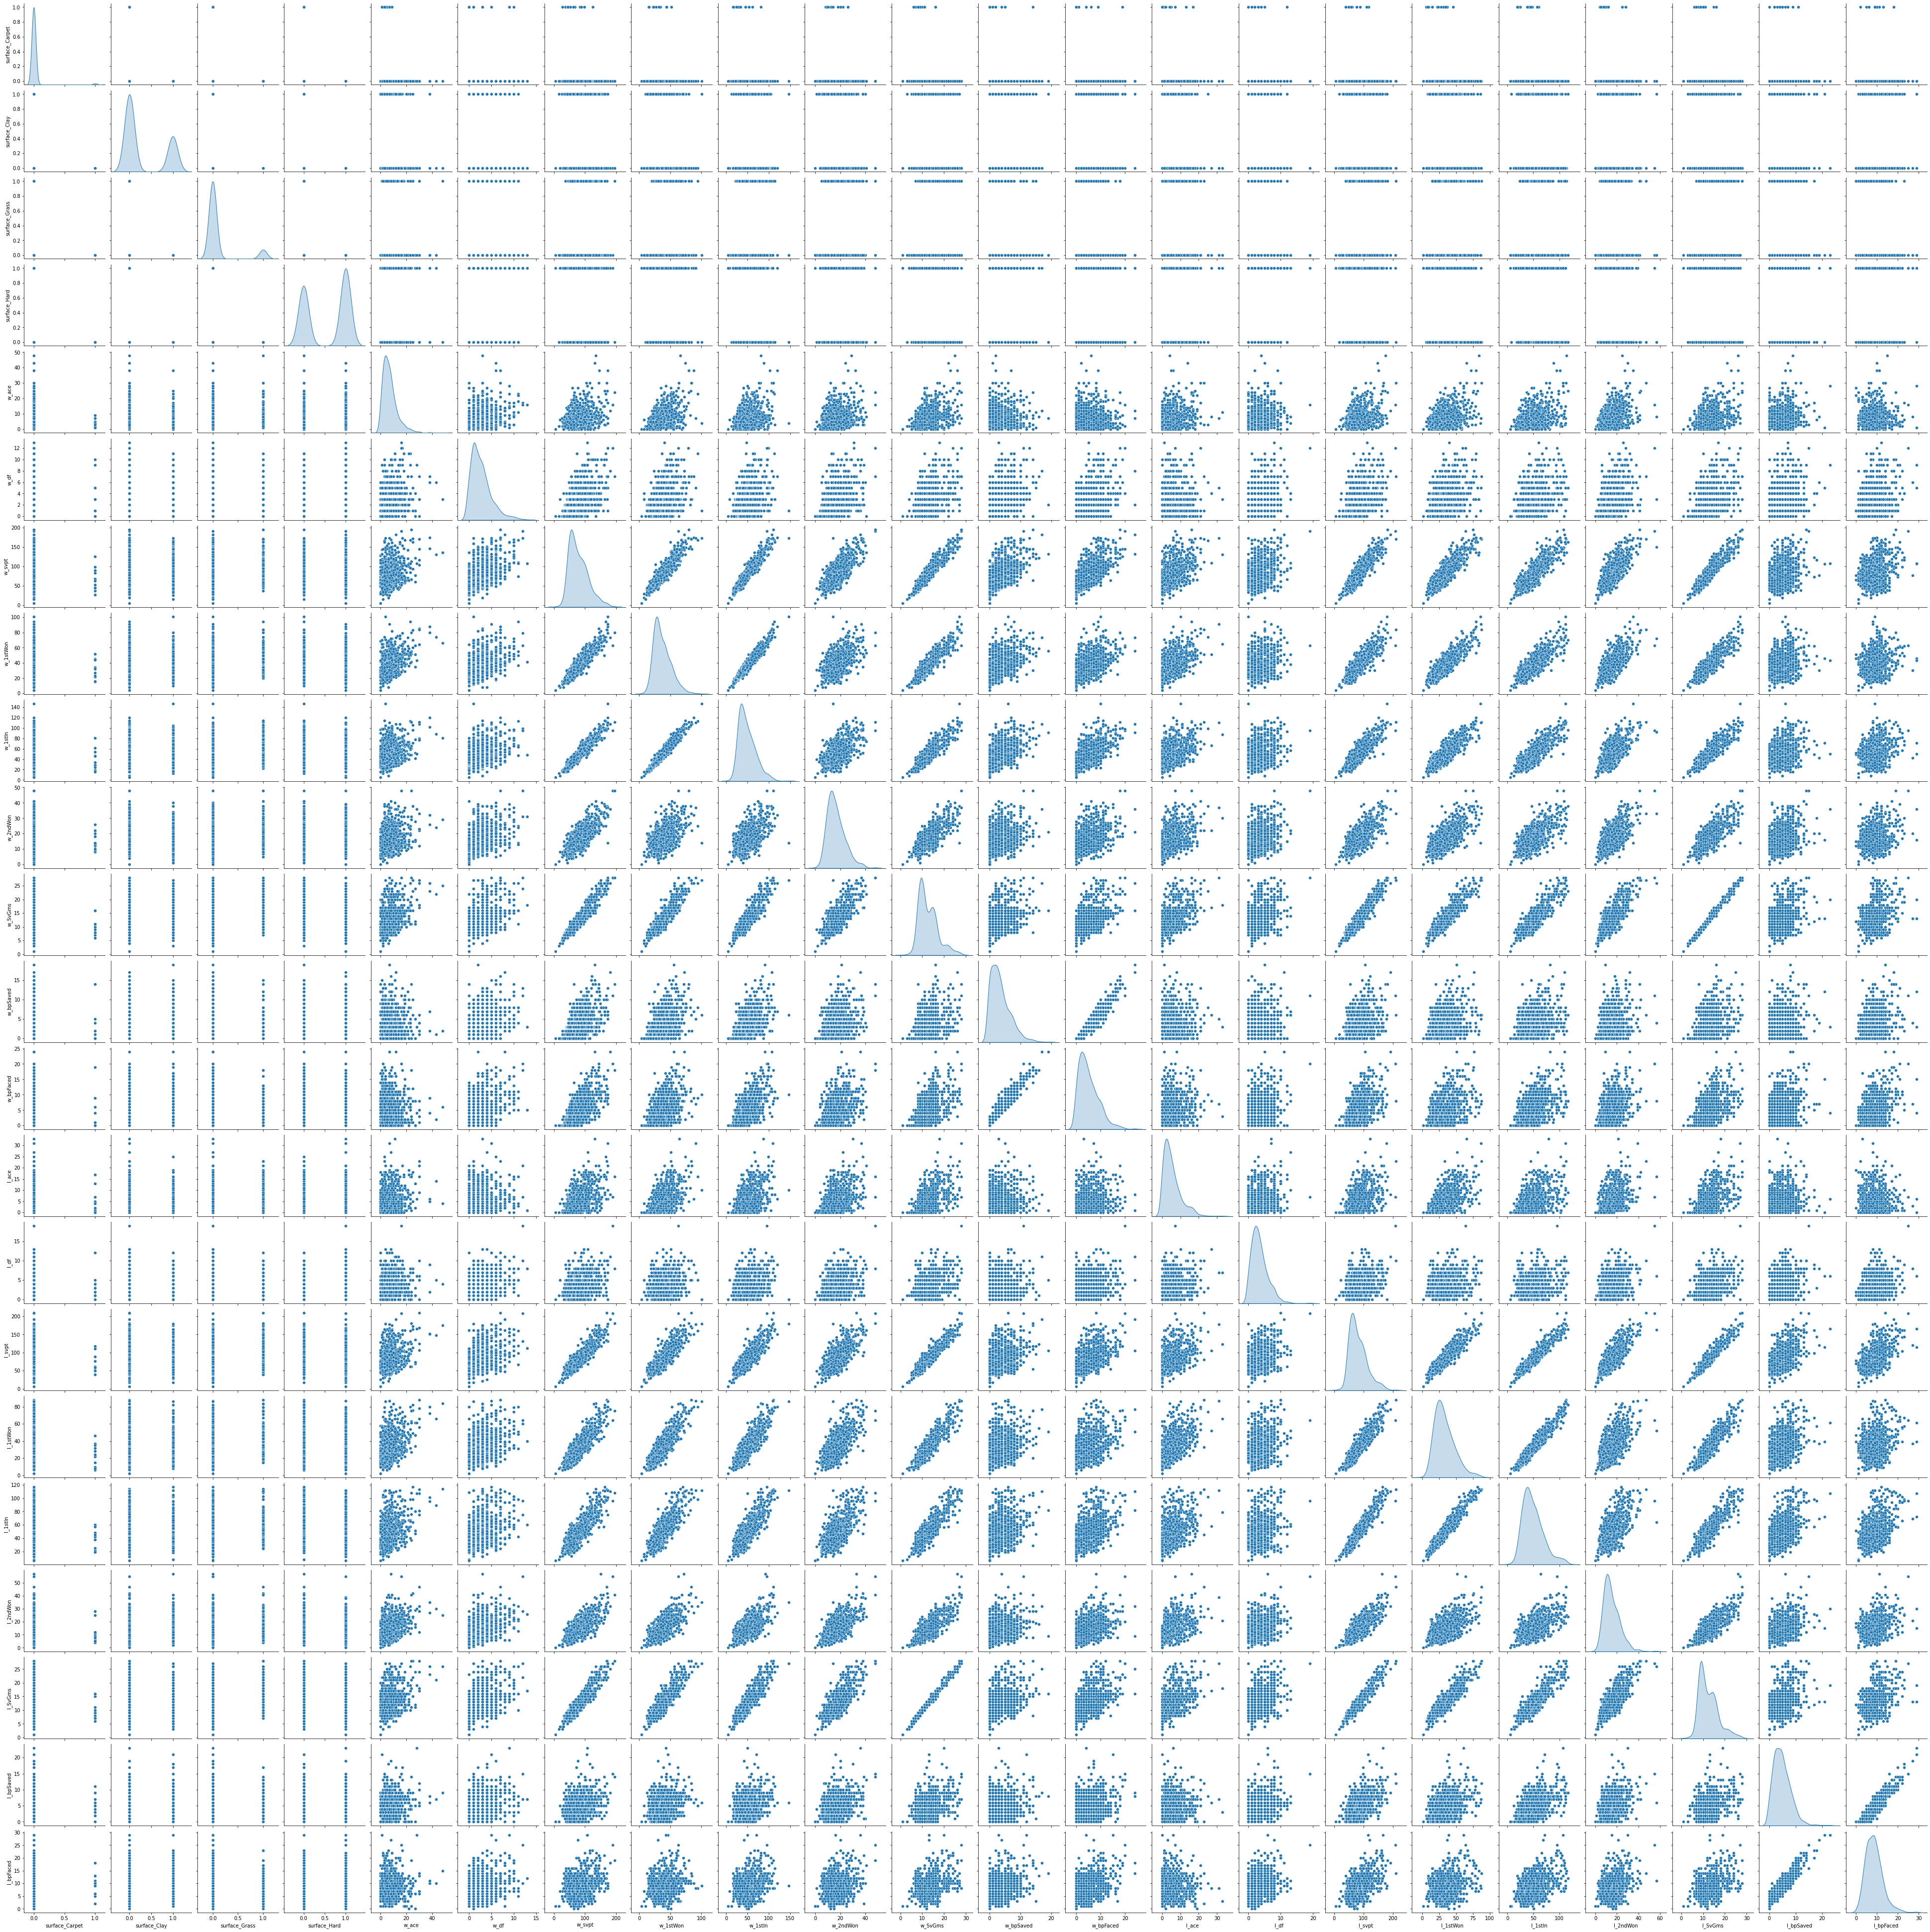

In [94]:
# Choose randomly 1000 rows from the dataframe
sample_metrics_df = metrics_df.sample(n=1000, random_state=1)

# Pairplot of the metrics data
sns.pairplot(sample_metrics_df, diag_kind="kde")
plt.savefig("pairplot_metrics.png")
plt.show()

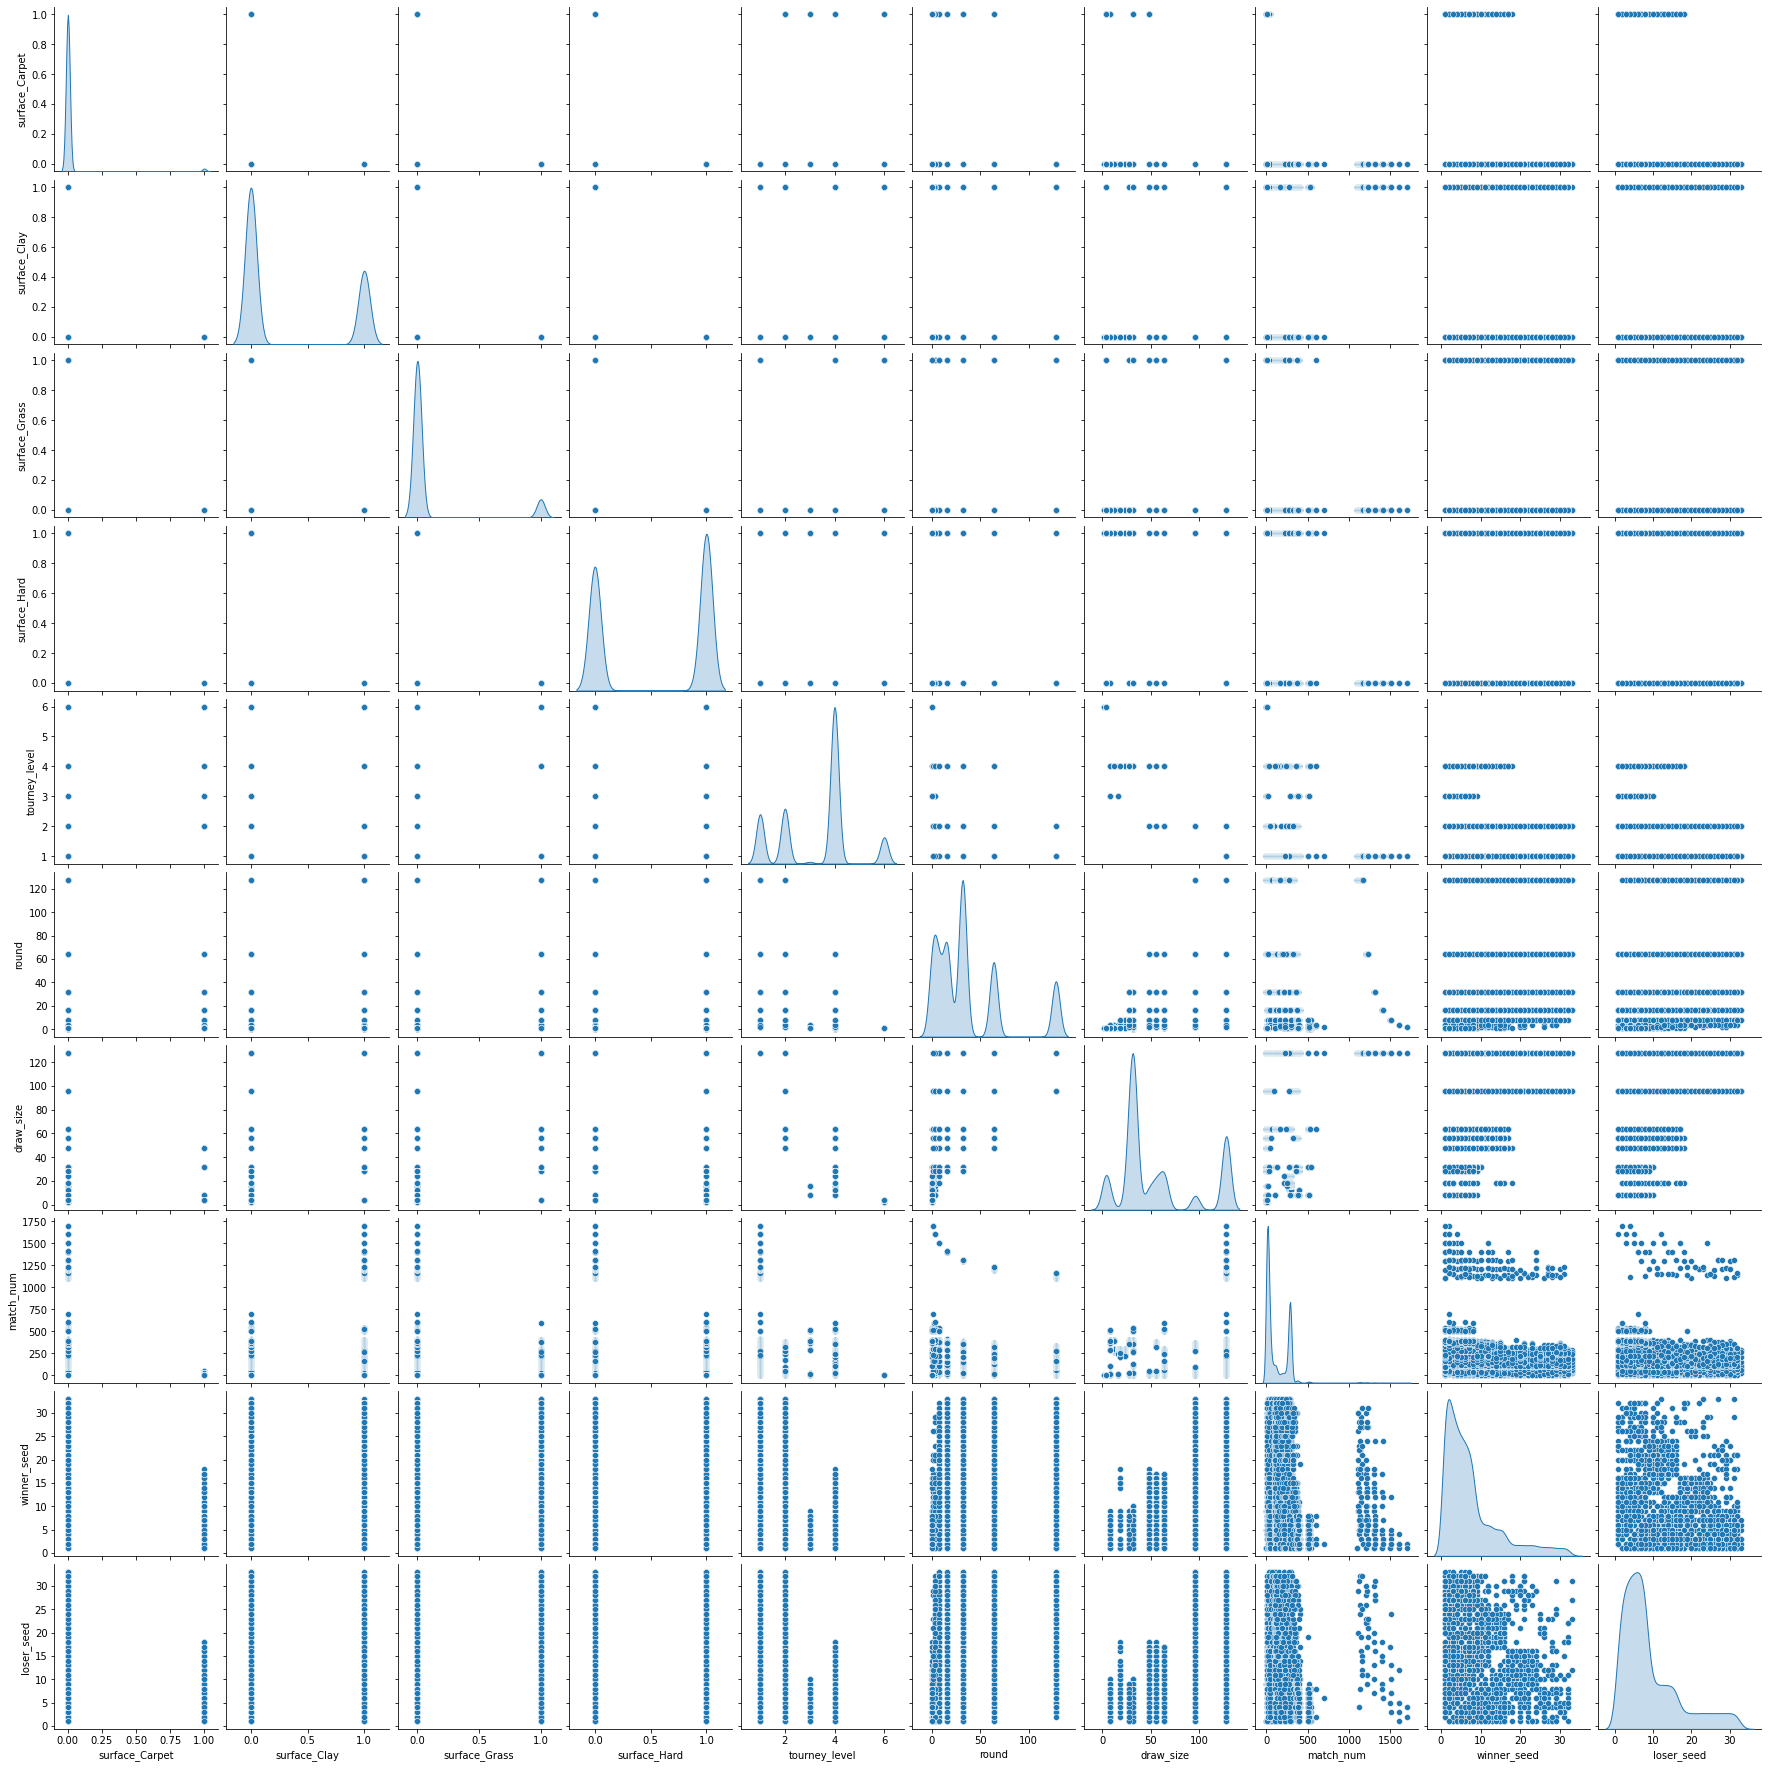

In [95]:
# Choose randomly 1000 rows from the dataframe
# general_df = general_df.sample(n=10000, random_state=1)

# Pairplot of the metrics data
sns.pairplot(general_df, diag_kind="kde")
plt.savefig("pairplot_metrics.png")
plt.show()

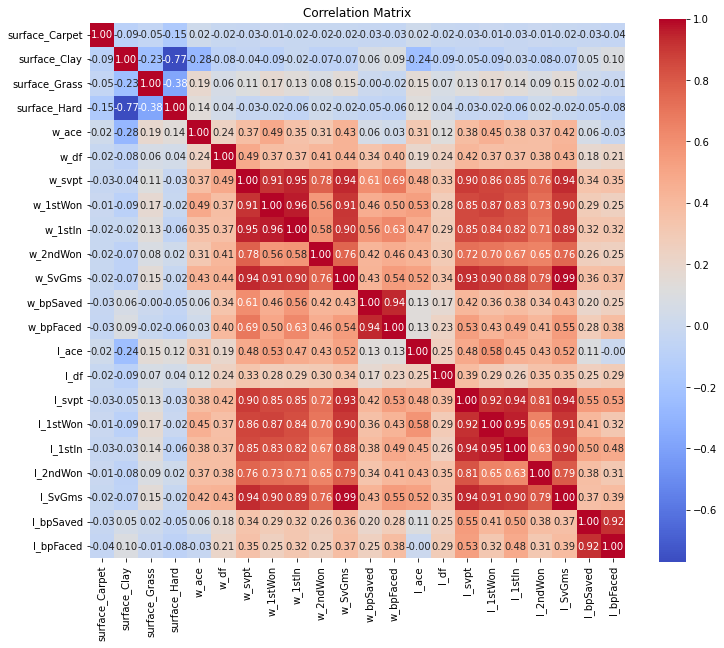

In [96]:
# Correlation matrix
corr = metrics_df.corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.png")
plt.show()

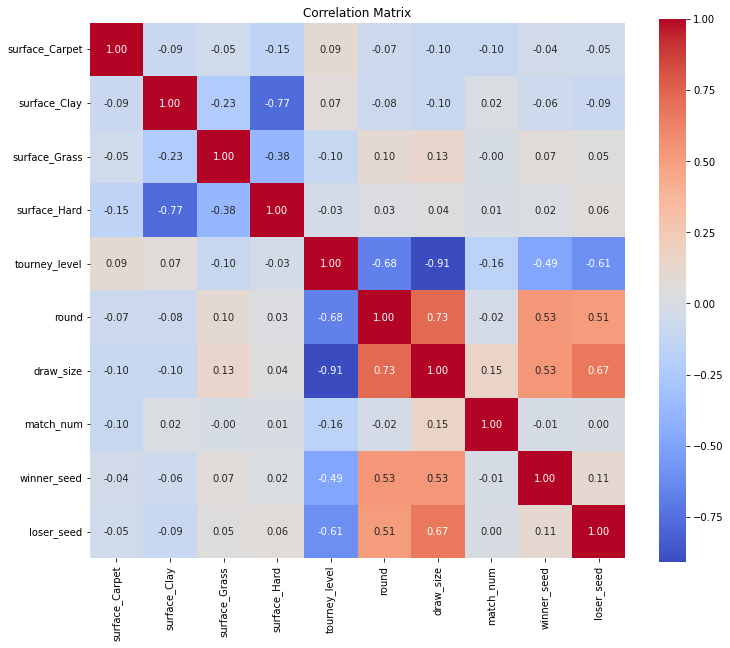

In [97]:
# Correlation matrix
corr = general_df.corr()
# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.png")
plt.show()

In [98]:
# Output all unique values for surface
# print(matches_df['surface'].unique())

# Separate the data by surface
hard_df = matches_df["surface_Hard"]
clay_df = matches_df["surface_Clay"]
grass_df = matches_df["surface_Grass"]
carpet_df = matches_df["surface_Carpet"]

print(hard_df.info())

<class 'pandas.core.series.Series'>
Index: 61737 entries, 0 to 61789
Series name: surface_Hard
Non-Null Count  Dtype
--------------  -----
61737 non-null  bool 
dtypes: bool(1)
memory usage: 542.6 KB
None
